In [16]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import cifar10
import tensorflow as tf

print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))
print('CPU detected:', tf.config.list_physical_devices('CPU')) 

Tensorflow version: 2.8.0
GPU detected: []
CPU detected: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [17]:
import numpy as np
import matplotlib.pyplot as plt 

In [18]:
dataset = cifar10.load_data()   

In [19]:
(x_train, y_train), (x_test, y_test) = dataset
assert x_train.shape == (50000, 32, 32, 3) 
assert x_test.shape == (10000, 32, 32, 3)  
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)  

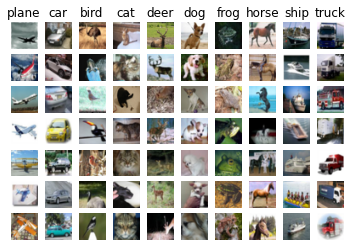

In [20]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show() 

In [21]:
class KNearestNeighbor(object):
    def __init__(self):
        pass
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X, k=1, num_loops=0):
        if num_loops == 0:
            dists = self.compute_distances(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)
        return self.predict_labels(dists, k=k)


    def compute_distances(self, X):   
        num_test = X.shape[0]  
        num_train = self.X_train.shape[0] 
        dists = np.zeros((num_test, num_train))  
        dists = np.sqrt(np.sum(np.square(self.X_train), axis=1) + np.sum(np.square(X), axis=1)[:, np.newaxis] - 2 * np.dot(X, self.X_train.T))  
        pass                  
        return dists  
    

    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0] 
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            sorted_dist = np.argsort(dists[i])
            closest_y = list(self.y_train[sorted_dist[0:k]])
            pass             
            y_pred[i]= (np.argmax(np.bincount(closest_y)))
            pass
        return y_pred



# sub sampling of the data

In [22]:
# Memory error prevention by subsampling data

num_training = 10000
mask = list(range(num_training))
X_train = x_train[mask]
y_train = y_train[mask]

num_test = 1000
mask = list(range(num_test))
X_test = x_test[mask]
y_test = y_test[mask]
y_test.shape


(1000, 1)

In [23]:
# x_train1 = x_train[:10000]
# y_train1 = y_train[:10000]  
# x_test1 = x_test[:1000]
# y_test1 = y_test[:1000]  

In [24]:
# print(x_train1.shape)
# print(x_test1.shape)
# print(y_train1.shape)
# print(y_test1.shape)


In [25]:
x_train = np.reshape(x_train, (x_train.shape[0], -1)) 
y_train = np.reshape(y_train, (y_train.shape[0], ))
x_test = np.reshape(x_test, (x_test.shape[0], -1))  
y_test = np.reshape(y_test, (y_test.shape[0], )) 

In [26]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [27]:
print(y_train.shape)
print(y_test.shape) 

(10000,)
(1000,)


In [28]:
test_num = 1000

In [29]:
classifier = KNearestNeighbor()       
classifier.train(x_train, y_train) 
dists = classifier.compute_distances(x_test)  
y_test_pred = classifier.predict_labels(dists, k=5)     
num_correct = np.sum(y_test_pred == y_test)                                                     
accuracy = float(num_correct) / test_num                     
print('Got %d / %d correct => accuracy: %f' % (num_correct, test_num, accuracy))            